diff: 2.3864578632535492e-08
my time: 0.0005991458892822266 seconds
np time: 0.00014901161193847656 seconds


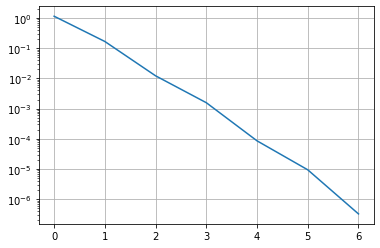

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import time

def solve(A, b, max_iterations_count, tol, use_grad):
    x = np.zeros_like(b)
    r = A @ x - b
    R = np.linalg.norm(r)
    residuals = [R,]
    iterations = 0
    while iterations < max_iterations_count and R > tol:
        if use_grad:
            t = R**2 / np.dot(A @ r, r)
        else:
            t = np.dot(r, A @ r) / np.linalg.norm(A @ r) ** 2
        x -= t * r
        r = A @ x - b
        R = np.linalg.norm(r)
        residuals.append(R)
        iterations += 1
    return x, residuals
    
N = 10
A = np.random.rand(N)
A = 0.5 * (A + A.T) + np.eye(N) * N
b = np.random.rand(N)

my_start = time.time()
my_solution, residuals = solve(A, b, 100, 10**(-6), False)
my_elapsed = time.time() - my_start

np_start = time.time()
np_solution = np.linalg.solve(A, b)
np_elapsed = time.time() - np_start

diff = np.linalg.norm(my_solution - np_solution)
print(f'diff: {diff}')
print(f'my time: {my_elapsed} seconds\nnp time: {np_elapsed} seconds')

residuals = np.array(residuals)
plt.semilogy(residuals)
plt.grid(True)
